# Библиотеки и исходный фрейм

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math

import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score,precision_recall_curve,\
roc_curve,roc_auc_score

import graphviz
import pydotplus

In [2]:
file_path = '/data/share/lab04data/lab04_train.csv'
df = pd.read_csv(file_path)
df=df.drop('Unnamed: 0',axis=1)
df.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,479990,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,450480,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,473954,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,531038,0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
4,349303,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0


In [3]:
len(df)

320764

# Задание

Для предоставленного вам тестового набора данных lab04_test.csv построить бинарный классификатор вероятного оттока клиентов. Критерий качества оценки – ROC AUC.

Выходной файл должен быть расположен в корне вашей домашней директории в файле lab04.csv. Файл должен содержать два поля, разделённых табом, а также шапку: id target.  

**Поле id** — идентично тому, что представлено в lab04_test.csv.  
**Поле target** — вероятность в пределах [0, 1] того, что данный клиент окажется отточным. Соответственно, 0 означает, что вы полностью уверены, что клиент останется с банком, а 1 — то, что клиент точно окажется в оттоке.

Для успешного прохождения лабы вы должны получить ROC AUC не меньше 0.75.

# Предобработка данных
## Чистка пустых строк и "мусорных" переменных

In [6]:
# Сбалансируем классы "в лоб" - возьмем все строки, где таргет = 1 и рандомно, где таргет = 0 

targets=df[df.TARGET ==1]
Other_set1,other_set2 = train_test_split(\
                                                df[df.TARGET == 0],test_size=0.43,
                                                 random_state=10)

df2=pd.concat([other_set2,targets])#.iloc[:20000]

df2.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
147382,491971,0,0.017246,NaN,NaN,NaN,NaN,0.0,0.136364,0.107835,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
300283,587513,0,0.058532,NaN,NaN,NaN,NaN,0.0,0.437500,0.584533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34967,207303,0,0.001314,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124869,584143,0,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
118066,511823,0,0.073723,0.0,25.0,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0


In [9]:
len(df2.columns.tolist())

116

In [10]:
# Если в переменной более 75тыс пустых строк - считаем ее бесполезной и выкидываем

for col in (df2.columns.tolist()):
    if df2[col].isnull().sum()>75000:
        df2=df2.drop(col,axis=1)

In [11]:
# Половину переменных удалили

len(df2.columns.tolist())

51

In [12]:
# Разделим переменные по типу данных
columns_float=[]
columns_str=[]
columns_bins=[]
for i in (df2.columns.tolist()):
    if ((df2[i].dtypes=='int64')|(df2[i].dtypes=='float64')) and len(df2[i].dropna().unique())>2:
        columns_float.append(i)
    elif (df2[i].dtypes=='object'):
        columns_str.append(i)
    else:
        columns_bins.append(i)

# Численные переменные заполним средним значением, где пусто
for col in columns_float:
    df2[col]=df[col].fillna(df[col].dropna().mean())
    
for col in columns_bins:
    df2[col]=df[col].fillna(df[col].dropna().mode())

In [14]:
df2.isnull().sum()

ID                              0
CR_PROD_CNT_IL                  0
AMOUNT_RUB_CLO_PRC              0
TURNOVER_DYNAMIC_IL_1M          0
AMOUNT_RUB_SUP_PRC              0
REST_DYNAMIC_FDEP_1M            0
REST_DYNAMIC_SAVE_3M            0
CR_PROD_CNT_VCU                 0
REST_AVG_CUR                    0
AMOUNT_RUB_NAS_PRC              0
CLNT_JOB_POSITION           62613
TRANS_COUNT_SUP_PRC             0
TRANS_COUNT_NAS_PRC             0
CR_PROD_CNT_TOVR                0
CR_PROD_CNT_PIL                 0
TURNOVER_CC                     0
TRANS_COUNT_ATM_PRC             0
AMOUNT_RUB_ATM_PRC              0
TURNOVER_PAYM                   0
AGE                             0
CR_PROD_CNT_CC                  0
REST_DYNAMIC_FDEP_3M            0
REST_DYNAMIC_IL_1M              0
CR_PROD_CNT_CCFP                0
REST_DYNAMIC_CUR_1M             0
REST_AVG_PAYM                   0
LDEAL_GRACE_DAYS_PCT_MED        0
REST_DYNAMIC_CUR_3M             0
CNT_TRAN_SUP_TENDENCY3M         0
TURNOVER_DYNAM

In [15]:
# Попробуем сделать "пользовательские" переменные из текстовой
ft_head=[]
ft_low=[]
ft_free=[]
for val in df2['CLNT_JOB_POSITION']:
    #x = float('nan')
    #print(val,type(val))
    if type(val)=='str':
        if math.isnan(val):
            ft_head.append(0)
        elif (re.search('менеджер',str.lower(val)))|(re.search('глав',str.lower(val)))\
        |(re.search('начальни',str.lower(val)))|(re.search('руковод',str.lower(val)))\
        |(re.search('директ',str.lower(val)))|(re.search('зам',str.lower(val))):
            ft_head.append(1)
        else:
            ft_head.append(0)

        if math.isnan(val):
            ft_low.append(0)
        elif (re.search('пенси',str.lower(val)))|(re.search('грузч',str.lower(val)))\
        |(re.search('рабоч',str.lower(val)))|(re.search('продав',str.lower(val)))\
        |(re.search('водит',str.lower(val)))|(re.search('повар',str.lower(val)))\
        |(re.search('студент',str.lower(val)))|(re.search('слесарь',str.lower(val)))\
        |(re.search('техник',str.lower(val)))|(re.search('механик',str.lower(val)))\
        |(re.search('охран',str.lower(val))):
            ft_low.append(1)
        else:
            ft_low.append(0)

        if math.isnan(val):
            ft_free.append(0)   
        elif (re.search('ИП',val))|(re.search('предпринимат',str.lower(val)))\
        |(re.search('учредит',str.lower(val))):
            ft_free.append(1)
        else:
            ft_free.append(0)
    else:
        ft_head.append(0)
        ft_low.append(0)
        ft_free.append(0)


In [16]:
df2=df2.drop('CLNT_JOB_POSITION',1)
df2['IS_HEAD_JOB']=ft_head
df2['IS_LOW_JOB']=ft_low
df2['IS_IP_JOB']=ft_free

In [17]:
#Т.к в строковой переменной не много уникальных значений - создадим под каждое флаг
df2.PACK.unique()
t = pd.get_dummies(df2.PACK, prefix='PACK')
df2=df2.join(t)
df2=df2.drop('PACK',1)

In [18]:
#Попробуем обучить на соотношении 20/80
df2.TARGET.value_counts()

0.0    126682
1.0     26156
Name: TARGET, dtype: int64

## Выбор и обучение модели 

In [19]:
# Разбили фичи и таргет
y =df2.TARGET
X = df2.drop('TARGET',1)

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152838 entries, 147382 to 320761
Data columns (total 63 columns):
ID                          152838 non-null int64
CR_PROD_CNT_IL              152838 non-null int64
AMOUNT_RUB_CLO_PRC          152838 non-null float64
TURNOVER_DYNAMIC_IL_1M      152838 non-null float64
AMOUNT_RUB_SUP_PRC          152838 non-null float64
REST_DYNAMIC_FDEP_1M        152838 non-null float64
REST_DYNAMIC_SAVE_3M        152838 non-null float64
CR_PROD_CNT_VCU             152838 non-null float64
REST_AVG_CUR                152838 non-null float64
AMOUNT_RUB_NAS_PRC          152838 non-null float64
TRANS_COUNT_SUP_PRC         152838 non-null float64
TRANS_COUNT_NAS_PRC         152838 non-null float64
CR_PROD_CNT_TOVR            152838 non-null float64
CR_PROD_CNT_PIL             152838 non-null float64
TURNOVER_CC                 152838 non-null float64
TRANS_COUNT_ATM_PRC         152838 non-null float64
AMOUNT_RUB_ATM_PRC          152838 non-null float64
TURN

In [78]:
# Разбили на train/ test
X_train,X_test,y_train,y_test = train_test_split(\
                                                X,y,test_size=0.33,
                                                 random_state=10)

In [79]:
# Для инфо - кол-во переменных, на которых строим модель
len(X_test.drop('ID',1).columns)

62

In [92]:
# Попробуем самое простое - бинароное дерево с максимальной глубиной = 5 и минимальным кол-вом сэмплов в листе = 30
model = DecisionTreeClassifier(max_depth=5,min_samples_leaf=30)

model.fit(X_train.drop('ID',1),y_train)

pred = model.predict_proba(X_test.drop('ID',1))[:,1]

In [93]:
pred

array([0.03103709, 0.18666873, 0.11669058, ..., 0.09769837, 0.02665976,
       0.09769837])

In [82]:
# В исходном фрейме была 1 битая строка, это был кусок для того, чтобы отловить ее
for i in (y_test):
    if (i!=0) & (i!=1) :
        print(i)

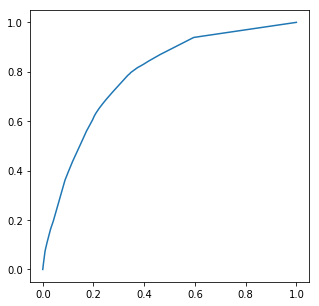

In [83]:
# ROC - кривая
fpr,tpr,thresholds = roc_curve (y_test,pred)

_,ax =plt.subplots(figsize = (5,5))
ax.plot(fpr,tpr)

**Метрики**

$$
Precision = {TP \over TP + FP}
$$

$$
Recall = {TP \over TP + FN}
$$

$$
F1 = {2* precision * recall \over precision + recall}
$$

$$
Accuracy = {TP + TN \over TP + FN + TN + FP}
$$

In [84]:
# Для инфо трешхолды при TRP >=80%
answer= pd.DataFrame()
answer['TPR']=tpr
answer['FPR']=fpr
answer['thresholds']=thresholds
answer[answer.TPR>=0.8]

,TPR,FPR,thresholds
26,0.816423,0.373059,0.122112
27,0.829395,0.395761,0.120658
28,0.842483,0.416118,0.116691
29,0.869354,0.462096,0.098545
30,0.938731,0.594766,0.097698
31,0.943479,0.625218,0.031037
32,1.000000,1.000000,0.026660


In [85]:
# Целевая метрика 
roc_auc_score(y_test,pred)

0.7868817163527941

In [86]:
# Какие переменные важны
ans=pd.DataFrame()
ans=pd.DataFrame(
        model.feature_importances_, X_test.drop('ID',1).columns
)
ans.iloc[:,0].sort_values(ascending=False)[ans.iloc[:,0]>0]#.index.tolist

REST_AVG_CUR                0.477717
REST_DYNAMIC_CUR_1M         0.196033
REST_AVG_PAYM               0.092246
AMOUNT_RUB_ATM_PRC          0.073177
REST_DYNAMIC_PAYM_1M        0.061291
CLNT_SETUP_TENOR            0.026032
SUM_TRAN_ATM_TENDENCY1M     0.020856
TURNOVER_DYNAMIC_CUR_3M     0.019515
AMOUNT_RUB_NAS_PRC          0.009910
REST_DYNAMIC_CUR_3M         0.007404
PACK_K01                    0.007025
TRANS_CNT_TENDENCY3M        0.005397
TURNOVER_DYNAMIC_PAYM_1M    0.003397
Name: 0, dtype: float64

In [107]:
# Важными оказались всего 13 фичей, попробуем обучить модель только на них, причем только на самых важных 
# и посмотреть на скор
featues=[]
featues=ans.iloc[:,0].sort_values(ascending=False)[ans.iloc[:,0]>0.01].index.tolist()
featues.append('ID')
featues

['REST_AVG_CUR',
 'REST_DYNAMIC_CUR_1M',
 'REST_AVG_PAYM',
 'AMOUNT_RUB_ATM_PRC',
 'REST_DYNAMIC_PAYM_1M',
 'CLNT_SETUP_TENOR',
 'SUM_TRAN_ATM_TENDENCY1M',
 'TURNOVER_DYNAMIC_CUR_3M',
 'ID']

In [109]:
model2 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=30)

model2.fit(X_train[featues].drop('ID',1),y_train)

pred2 = model2.predict_proba(X_test[featues].drop('ID',1))[:,1]

In [110]:
# Ничего :) и ладно
roc_auc_score(y_test,pred2)

0.7868345904930133

## Визуализация дерева

In [94]:
# Export resulting tree to DOT source code string
dot_data = export_graphviz(model,
                                feature_names=X_train.drop('ID',1).columns,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"40,40!"')
pydot_graph.write_png('resized_tree.png')

True

# PREDICT

In [96]:
file_path_final='/data/share/lab04data/lab04_test.csv'
df_final= pd.read_csv(file_path_final)
df_final=df_final.drop('Unnamed: 0',axis=1)

In [97]:
df_final.PACK.unique()
t = pd.get_dummies(df_final.PACK, prefix='PACK')
df_final=df_final.join(t)
df_final=df_final.drop('PACK',1)

In [101]:
# Для простоты теста - пойдем по второй модели с усеченным списком фичей
df_final=df_final[featues]

In [102]:
columns_float=[]
columns_str=[]
columns_bins=[]
for i in (df_final.columns.tolist()):
    if ((df_final[i].dtypes=='int64')\
        |(df_final[i].dtypes=='float64'))\
    and len(df_final[i].dropna().unique())>2:
        columns_float.append(i)
    elif (df_final[i].dtypes=='object'):
        columns_str.append(i)
    else:
        columns_bins.append(i)

In [103]:
for col in columns_float:
    df_final[col]=df_final[col].fillna(df_final[col].dropna().mean())
for col in columns_bins:
    df_final[col]=df_final[col].fillna(df_final[col].dropna().mean())

In [104]:
df_final.isnull().sum()

REST_AVG_CUR               0
REST_DYNAMIC_CUR_1M        0
REST_AVG_PAYM              0
AMOUNT_RUB_ATM_PRC         0
REST_DYNAMIC_PAYM_1M       0
CLNT_SETUP_TENOR           0
SUM_TRAN_ATM_TENDENCY1M    0
TURNOVER_DYNAMIC_CUR_3M    0
ID                         0
dtype: int64

In [111]:
pred = model2.predict_proba(df_final.drop('ID',1))[:,1]

In [112]:
pred

array([0.26031237, 0.02683292, 0.02683292, ..., 0.46189024, 0.14419226,
       0.18666873])

In [113]:
df_final['target']=pred
Answer = df_final[['ID','target']]
#.join(df2.ID).head()

In [114]:
Answer.head()

,ID,target
0,519130,0.260312
1,234045,0.026833
2,401256,0.026833
3,551070,0.031037
4,367285,0.097698


In [116]:
# Save result
with open('lab04.csv', 'a') as file:
    #file.write('Custom String\n')
    Answer.to_csv(file, header=True, index=False, sep = '\t')

file.close()

In [117]:
# Результат 0.78977905293 - даже с учетеом отсутствия каких-либо преобразований и сложных моделей, порог преодолен